In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../build/lib.linux-x86_64-3.6')
sys.path.append('../thirdparty/opencv/lib')
%matplotlib inline
import blobextractor
import pandas as pd
import time

bin_edges=np.arange(1,255)

In [2]:
from test_blobextractor import TestBeeTrackTracker
test=TestBeeTrackTracker()
croper=blobextractor.BlobCroper()

In [3]:
mask,background = test.get_maskbackground()
blob, blob_center, blob_axes, blob_angle = test.get_randomblob(mask,background)
print(blob_center,blob_axes,blob_angle)

[846 557] [78 20] 174.912434825


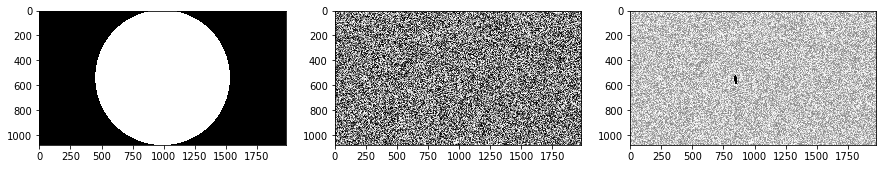

In [4]:
f,axarr=plt.subplots(1,3,figsize=(15,4))
for i, image in enumerate([mask,background,blob]):
    ax=axarr[i]
    ax.imshow(image,cmap=plt.get_cmap('gray'))

21.720156226721073 Hz


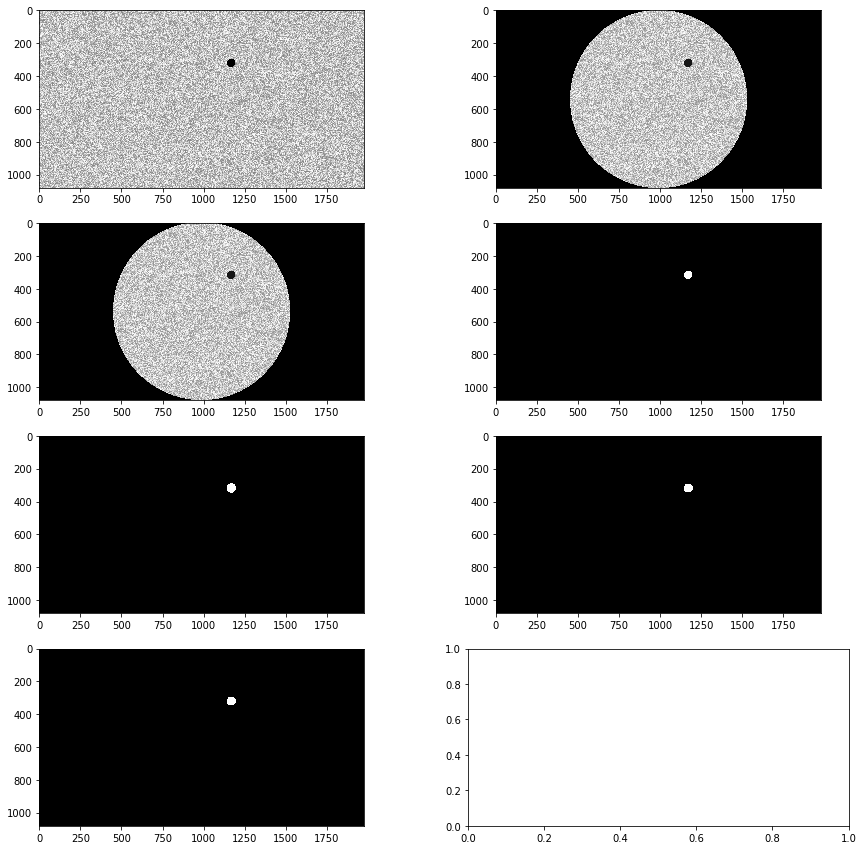

In [5]:
mybee=blobextractor.BlobFinder(mask)
mybee.gaussian_blur=1
mybee.area_lim=[0,10000]
mybee.roundness_lim=[0,1]
mybee.erode_iter=1
mybee.dilate_iter=3
mybee.run(background)

max_error_pos=1 #px
max_angle_pos=1 #deg
max_simulated_blob=1

for _ in range(50):
    blob, blob_center, blob_axes, blob_angle = test.get_randomblob(mask,background)
    mybee.run(blob)
    
blobs=pd.DataFrame(index=np.arange(100),columns=['x','y','h','w','angle'],dtype=np.float)
detections=np.nan*blobs.copy()
t_start=time.time()

__histogram=np.zeros(bin_edges.shape[0]-1)
for frame_i in blobs.index:
    blob, blob_center, blob_axes, blob_angle = test.get_randomblob(mask,background)
    blobs.loc[frame_i,['x','y']]=blob_center
    blobs.loc[frame_i,['h','w']]=blob_axes
    blobs.loc[frame_i,['angle']]=blob_angle
    
    mybee.run(blob)
    contours=mybee.filtered_contours
    if len(contours)>1:
        raise ValueError('Too many blobs detected')
    elif len(contours)<1:
        raise ValueError('Too few blobs detected')
    contours=contours[0]
    detections.loc[frame_i,['x','y']]=contours[0]
    detections.loc[frame_i,['h','w']]=contours[1]
    detections.loc[frame_i,['angle']]=contours[2]
    
    px_error=np.sqrt(np.sum(contours[0]-blob_center)**2)
    assert (px_error<max_error_pos), 'pixel error is too large {}>{}'.format(px_error,max_error_pos)
    angle_error=np.sqrt(np.sum(contours[2]-blob_angle)**2)
    #assert (angle_error<max_angle_pos), 'angle error is too large {}>{}'.format(angle_error,max_angle_pos)
    
    iamge2crop=mybee.original_image.astype(float)
    iamge2crop[mybee.processed_image==0]=np.nan
    croped_images=croper.crop(iamge2crop,mybee.filtered_contours)
    
    hist=croped_images[0].flatten()
    hist=hist[np.isnan(hist)==False]
    hist, _ =np.histogram(hist,bins=bin_edges)
    if np.sum(hist)!=0:
        hist=np.cumsum(hist/np.sum(hist))
    else:
        hist=0
    __histogram+=hist/blobs.shape[0]
    
t_end=time.time()
t_elapsed=t_end-t_start
frame_per_sec=blobs.shape[0]/t_elapsed
print(frame_per_sec, 'Hz')

f,axarr=plt.subplots(4,2,figsize=(15,15))
axarr=axarr.flatten()
for i, myim in enumerate([mybee.original_image,
                          mybee.masked_image,
                          mybee.blured_image,
                          
                          mybee.segmented_image,
                          mybee.dilated_image,
                          mybee.eroded_image,
                          mybee.processed_image]):
    ax=axarr[i]
    ax.imshow(myim,cmap=plt.get_cmap('gray'))

In [6]:
from collections import namedtuple
MyStruct = namedtuple("MyStruct", "field1 field2 field3")

ValueError: Type names and field names must be valid identifiers: 'field1.x'

In [9]:
a=MyStruct(MyStruct(1,2,3),2,3)
a.field1.field2

2

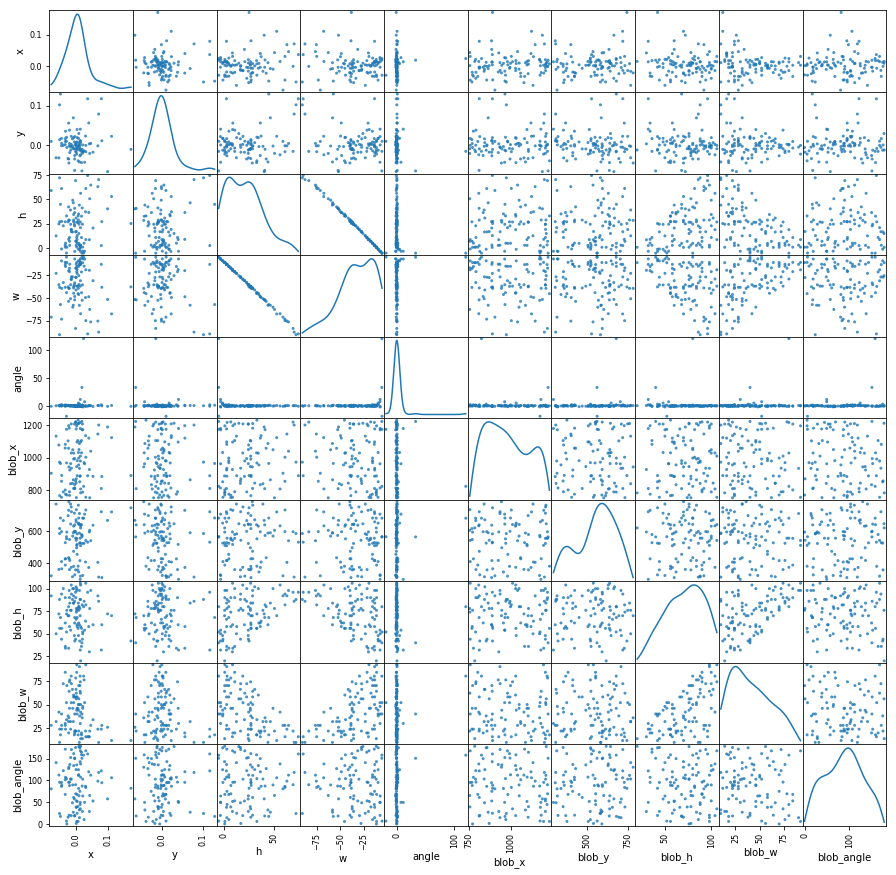

In [6]:
from pandas.plotting import scatter_matrix
df=blobs-detections
for col in blobs.columns:
    df['blob_'+col]=blobs.loc[:,col]
df=df.dropna()
scatter_matrix(df, alpha=0.8, figsize=(15, 15), diagonal='kde');

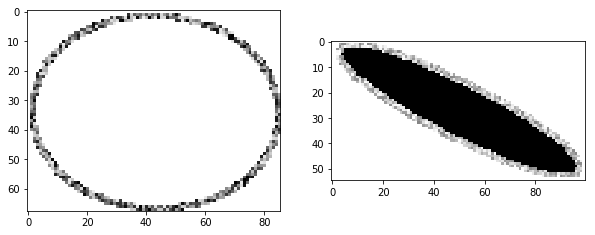

In [20]:

iamge2crop=mybee.original_image.astype(float)
iamge2crop[mybee.processed_image==0]=np.nan
croped_images=croper.crop(iamge2crop,mybee.filtered_contours)
f,axarr=plt.subplots(1,min(4,len(croped_images)),figsize=(10,10))
if not isinstance(axarr,np.ndarray):
    axarr=[axarr]
for i in range(len(axarr)):
    ax=axarr[i]
    ax.imshow(
        ,cmap=plt.get_cmap('gray'))

In [22]:
blob_axes

array([80, 62], dtype=uint64)

In [14]:
mybee=blobextractor.BlobFinder(mask)
mybee.gaussian_blur=1
mybee.area_lim=[0,10000]
mybee.roundness_lim=[0,1]
mybee.erode_iter=1
mybee.dilate_iter=3
mybee.run(background)

max_error_pos=1 #px
max_angle_pos=1 #deg
max_simulated_blob=1

for _ in range(50):
    blob, blob_center, blob_axes, blob_angle = test.get_randomblob(mask,background)
    mybee.run(blob)
    
blob, blob_center, blob_axes, blob_angle = test.get_randomblob(mask,background)
blob, blob_center, blob_axes, blob_angle = test.get_randomblob(mask,blob,color=255-20)
mybee.run(blob)

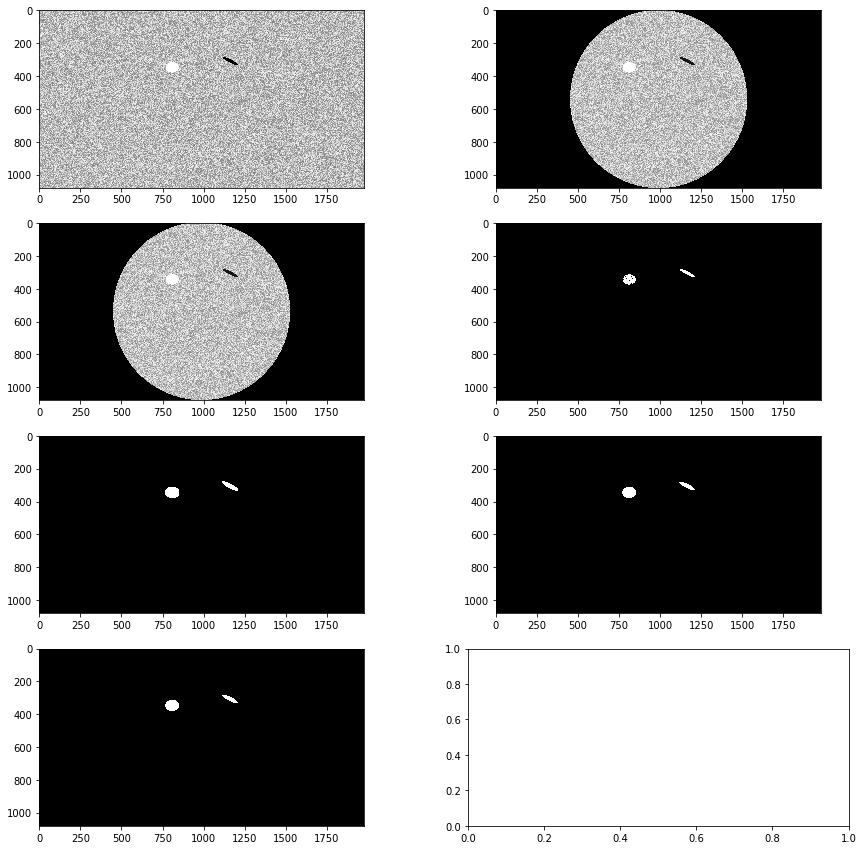

In [15]:
f,axarr=plt.subplots(4,2,figsize=(15,15))
axarr=axarr.flatten()
for i, myim in enumerate([mybee.original_image,
                          mybee.masked_image,
                          mybee.blured_image,
                          mybee.segmented_image,
                          mybee.dilated_image,
                          mybee.eroded_image,
                          mybee.processed_image]):
    ax=axarr[i]
    ax.imshow(myim,cmap=plt.get_cmap('gray'))

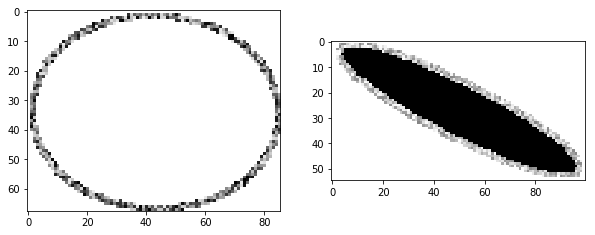

In [16]:
croper=blobextractor.BlobCroper()
iamge2crop=mybee.original_image.astype(float)
iamge2crop[mybee.processed_image==0]=np.nan



croped_images=croper.crop(iamge2crop,mybee.filtered_contours)
f,axarr=plt.subplots(1,min(4,len(croped_images)),figsize=(10,10))
if not isinstance(axarr,np.ndarray):
    axarr=[axarr]
for i in range(len(axarr)):
    ax=axarr[i]
    ax.imshow(croped_images[i],cmap=plt.get_cmap('gray'))

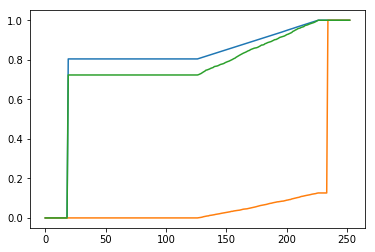

In [17]:
bfilter=blobextractor.BlobFilter(__histogram,bin_edges)
plt.plot(__histogram)
for im_i in croped_images:
    plt.plot(bfilter.hist2cumsum(bfilter.image2hist(im_i)))

In [18]:
bfilter.score(croped_images)

array([ 0.42461687,  0.37018138])